**Learning Curve Theory**
- Graph that compares the performance of a model on training and testing data over a varying number of training instances
- We should generally see performance improve as the number of training points increases
- When we separate training and testing sets and graph them individually
    - We can get an idea of how well the model can generalize to new data
- Learning curve allows us to verify when a model has learning as much as it can about the data
- When it occurs
    1. The performances on the training and testing sets reach a plateau
    2. There is a consistent gap between the two error rates
- The key is to find the sweet spot that minimizes bias and variance by finding the right level of model complexity
- Of course with more data any model can improve, and different models may be optimal
- For a more in-depth theoretical coverage of learning curves, you can view a guide by Andrew Ng that I have compiled [here](http://www.ritchieng.com/applying-machine-learning/)


**Types of learning curves**
- Bad Learning Curve: High Bias
    - When training and testing errors converge and are high
        - No matter how much data we feed the model, the model cannot represent the underlying relationship and has high systematic errors
        - Poor fit
        - Poor generalization
- Bad Learning Curve: High Variance
    - When there is a large gap between the errors
        - Require data to improve
        - Can simplify the model with fewer or less complex features
- Ideal Learning Curve
    - Model that generalizes to new data
    - Testing and training learning curves converge at similar values
    - Smaller the gap, the better our model generalizes
![](https://cdn-enterprise.discourse.org/udacity/uploads/default/original/3X/1/e/1e28f112574e48fea279ddf1b052c0d3e774f470.png)
![](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w6_ml_design/learning3.png)
![](https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w6_ml_design/learning2.png)


**Example 1: High Bias**
- In this example, you'll see that we'll be using a linear learner on quadratic data
- The result is that we've high bias
- We'll have a low score (high error)


In [1]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.cross_validation import KFold
import numpy as np

In [2]:
size = 1000
cv = KFold(size, shuffle=True)

**Create X array**

In [3]:
#np.reshape(old_shape, new_shape)

# new array (-1, 1)
# -1 implies to take shape from original, hence 1000
# this creates a 1000 x 1 array
X = np.reshape(np.random.normal(scale=2,size=size),(-1,1))
X.shape

(1000, 1)

In [4]:
# np.random.normal(scale=2,size=size) creates a 1000 x 1 matrix
# scale=2 is the standard deviation of the distribution
np.random.normal(scale=2,size=size).shape

(1000,)

**Create y array**

In [5]:
y = np.array([[1 - 2*x[0] +x[0]**2] for x in X])
y.shape

(1000, 1)

**Plot learning curve**

In [6]:
def plot_curve():
    # instantiate
    lg = LinearRegression()

    # fit
    lg.fit(X, y)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lg, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

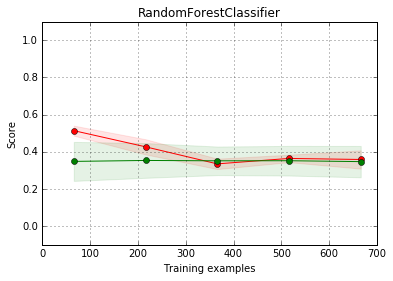

In [8]:
%matplotlib inline
plot_curve()

_**Compared to the theory we covered, here our y-axis is 'score', not 'error', so the higher the score, the better the performance of the model.**_
- Training score (red line) decreases and plateau
    - Indicates underfitting
    - High bias
- Cross-validation score (green line) stagnating throughout
    - Unable to learn from data
- Low scores (high errors)
    - Should tweak model (perhaps increase model complexity)

**Example 2: High Variance**
- Noisy data and complex model

<br /> There're no inline notes here as the code is exactly the same as above and are already well explained.

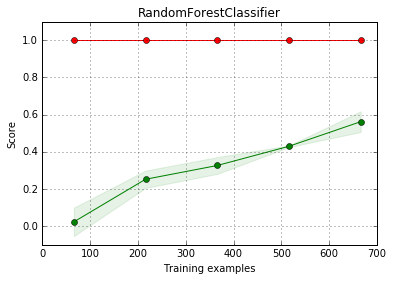

In [12]:
from sklearn.tree import DecisionTreeRegressor

X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # instantiate
    dt = DecisionTreeRegressor()

    # fit
    dt.fit(X, y)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(dt, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

plot_curve()

_**Compared to the theory we covered, here our y-axis is 'score', not 'error', so the higher the score, the better the performance of the model.**_
- Training score (red line) is at its maximum regardless of training examples
    - This shows severe overfitting
- Cross-validation score (green line) increases over time
- Huge gap between cross-validation score and training score indicates high variance scenario
    - Reduce complexity of the model or gather more data